# Project Summary

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import time

from game import Game, Player
from utils import investigate_game
from utils.investigate_game import InvestigateGame
from players.random_player import RandomPlayer
from players.min_max import MinMaxPlayer, AlphaBetaMinMaxPlayer
from players.monte_carlo_rl import MonteCarloRLPlayer
from players.monte_carlo_tree_search import MCTSPlayer
from players.human_player import HumanPlayer

import sys

# needed to load Seralized Monte Carlo RL Player
sys.modules['investigate_game'] = investigate_game

In [2]:
def plot_training_stats(rewards: list, step_size: int, switch_ratio: int | None = None) -> None:
    """
    Given a training list of rewards, this function plots the averages of the rewards
    using a given step size.

    Args:
        rewards: the rewards achieved during training time;
        step: the step size to be used to plot an average value;
        switch_ratio: define the moment in which minmax started playing-

    Returns:
        None.
    """

    # https://stackoverflow.com/questions/15956309/averaging-over-every-n-elements-of-a-numpy-array
    # compute the averages
    averages = np.mean(np.array(rewards).reshape(-1, step_size), axis=1)

    # define the width and height of the figure in inches
    plt.figure(figsize=(10, 5))
    # plot the averages
    plt.plot(averages, color='red', marker='o', linestyle='dashed', label='Training')
    # if minmax played
    if switch_ratio is not None:
        # compute the exact moment
        switch_moment = int(len(rewards) / step_size * switch_ratio)
        # print a vertical line at the moment minmax started playing
        plt.axvline(x=switch_moment, color='green', label='MinMax Starts Playing')
    # specify the title
    plt.title('Training Summary')
    # specify the x-axis label
    plt.xlabel('# of the step')
    # specify the y-axis label
    plt.ylabel('Mean rewards value')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

## Monte Carlo Reinforcement learning player

To train a Reinforcement Learning player based on a Monte Carlo technique, we used a method referred as [**Temporal Difference learning (TD)**](https://en.wikipedia.org/wiki/Temporal_difference_learning#Mathematical_formulation). In short, the training is performed in such a way that the _State-Value_ function is updated as follows:
$$
V(S_{t})\leftarrow (1-\alpha )V(S_{t})+\underbrace {\alpha } _{\text{learning rate}}[\overbrace {R_{t+1}+\gamma V(S_{t+1})} ^{\text{The TD target}}]
$$
where $S_{t}$ is the state at time $t$, $\gamma$ is the discount rate and $R_{t+1}$ is the reward at time $t+1$.


### Show the training

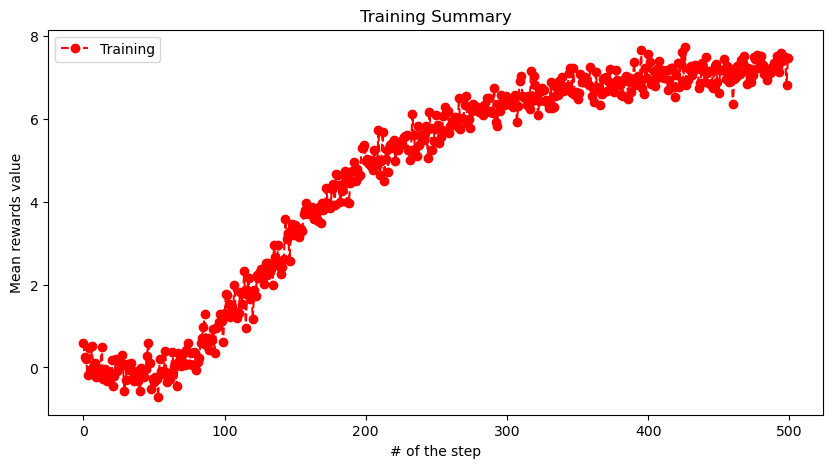

In [3]:
monte_carlo_rl_player = MonteCarloRLPlayer()
monte_carlo_rl_player.load('trained_agents/monte_carlo_rl.pkl')
plot_training_stats(monte_carlo_rl_player.rewards, step_size=1_000)

## Train MinMax

In [2]:
minmax_player = MinMaxPlayer(depth=3, enhance=True)
minmax_player.train(n_games=100)
minmax_player.save('trained_agents/minmax_depth3_player.pkl')

  0%|          | 0/100 [00:00<?, ?it/s]

Found states: 5,262,427: 100%|██████████| 100/100 [22:58<00:00, 13.78s/it]


New found states after 100 games: 5,262,427


## Train AlphaBetaMinMax

In [3]:
alphabeta_minmax_player = AlphaBetaMinMaxPlayer(depth=4, enhance=True)
alphabeta_minmax_player.train(n_games=20)
alphabeta_minmax_player.save('trained_agents/alphabeta_minmax_depth4_player')

Found states: 3,467,383: 100%|██████████| 20/20 [27:21<00:00, 82.05s/it]


New found states after 20 games: 3,467,383


## View Games

In [4]:
# create the first player
player1 = MinMaxPlayer()
# create the second player
player2 = RandomPlayer()
# create a new game
game = InvestigateGame(Game())
# LET'S BATTLE
winner = game.play(player1, player2, max_steps_draw=10)

-- BEGINNING OF THE GAME --
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
Player ❌ chose to move (0, 1) to the top
❌⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
Player ⭕️ chose to move (2, 4) to the right
❌⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⭕️
Player ❌ chose to move (0, 1) to the bottom
❌⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⭕️
Player ⭕️ chose to move (0, 1) to the top
⭕️⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⭕️
Player ❌ chose to move (4, 0) to the left
❌⭕️⬜️⬜️⬜️
❌⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⭕️
Player ⭕️ chose to move (3, 0) to the right
❌⭕️⬜️⬜️⭕️
❌⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⭕️
Player ❌ chose to move (0, 2) to the top
❌⭕️⬜️⬜️⭕️
❌⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⭕️
Player ⭕️ chose to move (0, 3) to the bottom
❌⭕️⬜️⬜️⭕️
❌⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⬜️
⭕️⬜️⬜️⬜️⭕️
Player ❌ chose to move (2, 4) to the left
❌⭕️⬜️⬜️⭕️
❌⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⬜️
❌⭕️⬜️⬜️⭕️
Winner: Player 0
-- END OF THE GAME --


## Play Games

In [9]:
# create the human player
human_player = HumanPlayer()

# create a mtcs player
monte_carlo_tree_search = MCTSPlayer(n_simulations=500, random=True)

# start the game
g = InvestigateGame(Game())
g.play(monte_carlo_rl_player, monte_carlo_tree_search, max_steps_draw=5)

-- BEGINNING OF THE GAME --
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
Player ❌ chose to move (0, 1) to the top
❌⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
Player ⭕️ chose to move (0, 1) to the bottom
❌⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⭕️⬜️⬜️⬜️⬜️
Player ❌ chose to move (4, 3) to the top
❌⬜️⬜️⬜️❌
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⭕️⬜️⬜️⬜️⬜️
Player ⭕️ chose to move (0, 1) to the bottom
❌⬜️⬜️⬜️❌
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⭕️⬜️⬜️⬜️⬜️
⭕️⬜️⬜️⬜️⬜️
Player ❌ chose to move (2, 4) to the top
❌⬜️❌⬜️❌
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⭕️⬜️⬜️⬜️⬜️
⭕️⬜️⬜️⬜️⬜️
Player ⭕️ chose to move (0, 1) to the bottom
❌⬜️❌⬜️❌
⬜️⬜️⬜️⬜️⬜️
⭕️⬜️⬜️⬜️⬜️
⭕️⬜️⬜️⬜️⬜️
⭕️⬜️⬜️⬜️⬜️
Player ❌ chose to move (3, 4) to the top
❌⬜️❌❌❌
⬜️⬜️⬜️⬜️⬜️
⭕️⬜️⬜️⬜️⬜️
⭕️⬜️⬜️⬜️⬜️
⭕️⬜️⬜️⬜️⬜️
Player ⭕️ chose to move (1, 0) to the left
⭕️❌❌❌❌
⬜️⬜️⬜️⬜️⬜️
⭕️⬜️⬜️⬜️⬜️
⭕️⬜️⬜️⬜️⬜️
⭕️⬜️⬜️⬜️⬜️
Player ❌ chose to move (0, 1) to the top
❌❌❌❌❌
⭕️⬜️⬜️⬜️⬜️
⭕️⬜️⬜️⬜️⬜️
⭕️⬜️⬜️⬜️⬜️
⭕️⬜️⬜️⬜️⬜️
Winner: Player 0
-- END OF THE GAME --


0

## Testing Players performance

In [4]:
def show_game_statistics(player1: Player, player2: Player, n_games: int) -> None:
    """
    Play a few games between two players and plot the calculated winning percentages.

    Args:
        players1: the first player;
        players2: the second player;
        n_games: how many games to play.

    Returns:
        None.
    """

    # define the width and height of the figure in inches
    plt.figure(figsize=(8, 5))

    # let the players play both first and second
    for plot, (player1, player2) in enumerate([(player1, player2), (player2, player1)]):
        # count how many wins for the first player
        player1_wins = 0

        # for each game
        for _ in range(n_games):
            # create the game
            game = Game()
            # play the game
            winner = game.play(player1, player2)
            # if the first player wins
            if winner == 0:
                # increment the counter
                player1_wins += 1

        # create a subplot
        plt.subplot(1, 2, plot + 1)
        # plot the first player wins
        bars = plt.bar([0, 0.6], [player1_wins, n_games - player1_wins], color=['royalblue', 'lightcoral'], width=0.4)
        # for each bar
        for bar in bars:
            # get the winning percentage
            percentage = bar.get_height() / n_games
            # write the percentage on top of the bar
            plt.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height(),
                f'{percentage:.2%}',
                ha='center',
                va='bottom',
                fontsize='medium',
            )
        # plot the players' names
        plt.xticks([0, 0.6], [player1.__class__.__name__, player2.__class__.__name__])
        # delete y-axis ticks and labels
        plt.tick_params(left=False, labelleft=False)
        # specify the y-axis label
        plt.ylabel('Wins')
        # specify the title shared between the subplots
        plt.title(
            f'{player1.__class__.__name__.replace("Player","")} VS {player2.__class__.__name__.replace("Player","")}',
            fontsize=10,
        )

    # specify the title shared between the subplots
    plt.suptitle(f'Summary of {n_games} games')

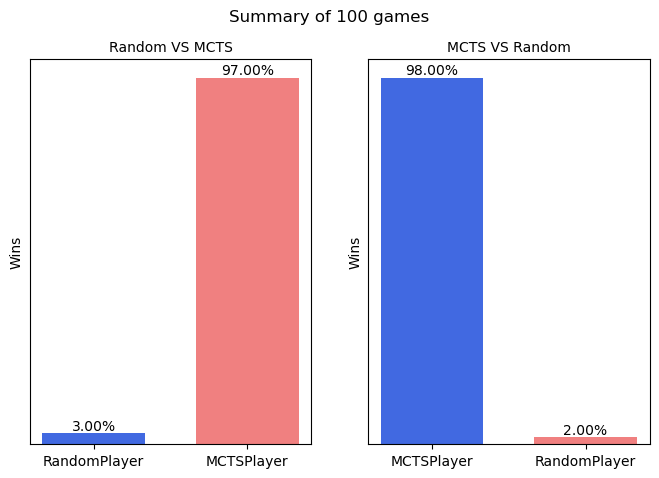

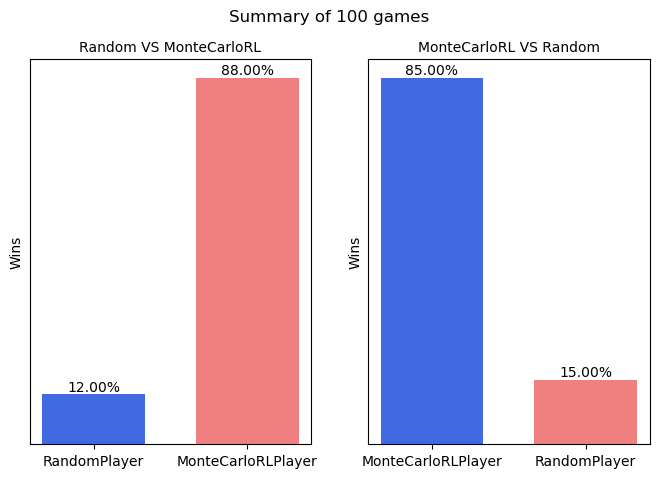

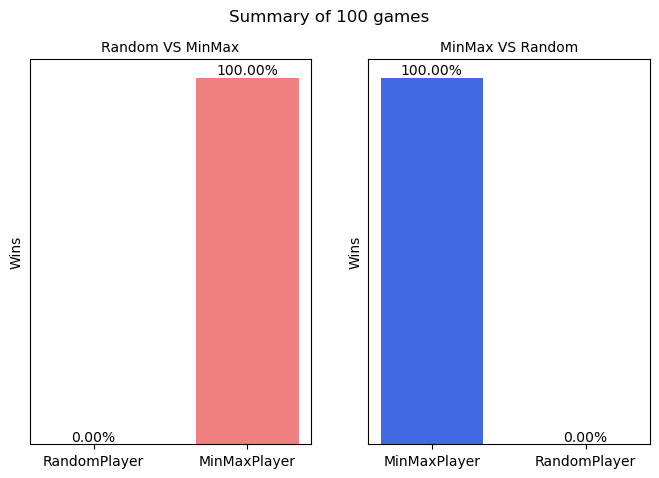

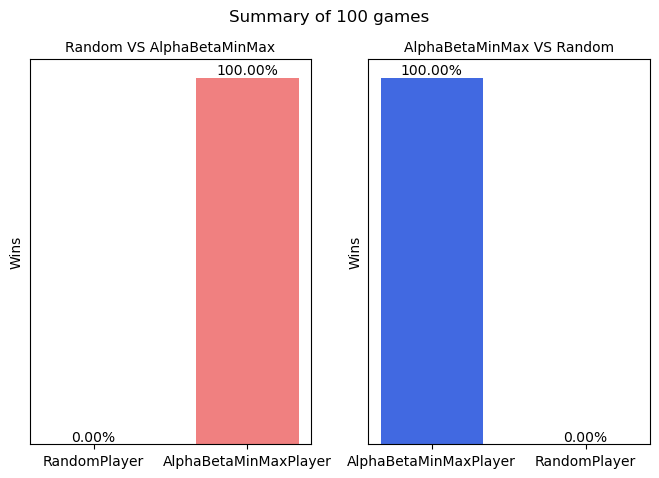

In [10]:
show_game_statistics(RandomPlayer(), MCTSPlayer(n_simulations=500, random=True), 100)
show_game_statistics(RandomPlayer(), monte_carlo_rl_player, 100)
show_game_statistics(RandomPlayer(), MinMaxPlayer(depth=3,enhance=True), 100)
show_game_statistics(RandomPlayer(), AlphaBetaMinMaxPlayer(depth=3,enhance=True), 100)

## Testing MinMax implementations

In [32]:
def show_minmax_statistics(player: MinMaxPlayer, minute: bool = False) -> None:
    """
    Play one game between the minmax player and a player that play random, and plot the duration time 
    of the game with different optimization.

    Args:
        player: a minmax player to test;
        minute: if display the time as minutes, otherwise are displayed as seconds.

    Returns:
        None.
    """

    # define the width and height of the figure in inches
    plt.figure(figsize=(8, 5))

    data = []

    # let the different flags
    for flag1, flag2 in [(False,True),(True,True),(False,False),(True,False),]:
        # set flags
        player.parallelize(flag1)
        player._symmetries = flag2
        # create the game
        game = Game()
        # take a start time
        start = time.time()
        # play the game
        game.play(player, RandomPlayer())
        # get the total time of a match
        total_time = time.time() - start
        # append the data to plot
        data.append(
            (
                f"{'Parallization' if flag1 and not flag2 else ('Parallization and Symmetries' if flag1 and flag2 else ('Symmetries' if flag2 and not flag1 else 'Nothing'))}"
                ,round(total_time/60,2) if minute else round(total_time,2)
            )
        )
        
    data = sorted(data, key=lambda x: x[1])
    # plot the results
    bars = plt.bar(*zip(*data), color=['royalblue'], width=0.25)
    # for each bar
    for i,bar in enumerate(bars):
        # write the game duration on top of the bar
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            data[i][1],
            ha='center',
            va='bottom',
            fontsize='medium',
        )
    
    # delete y-axis ticks and labels
    plt.tick_params(left=False, labelleft=False)
    # specify the y-axis label
    plt.ylabel('Minutes' if minute else 'Seconds')
    # specify the title 
    plt.title(
        f'Different durations of a game: {player.__class__.__name__} a depth {player._depth} vs RandomPlayer',
        fontsize=10,
    )
    plt.show()

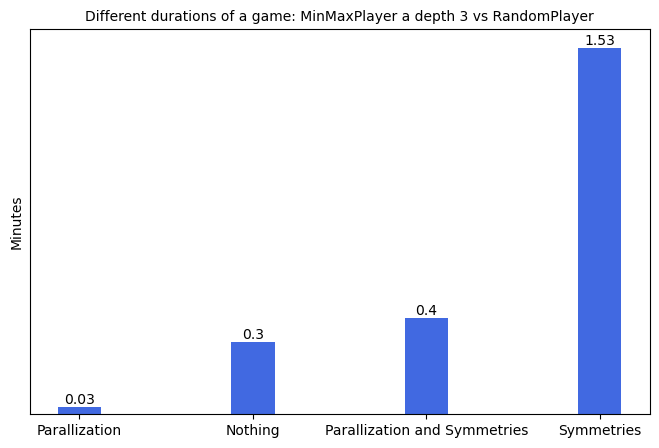

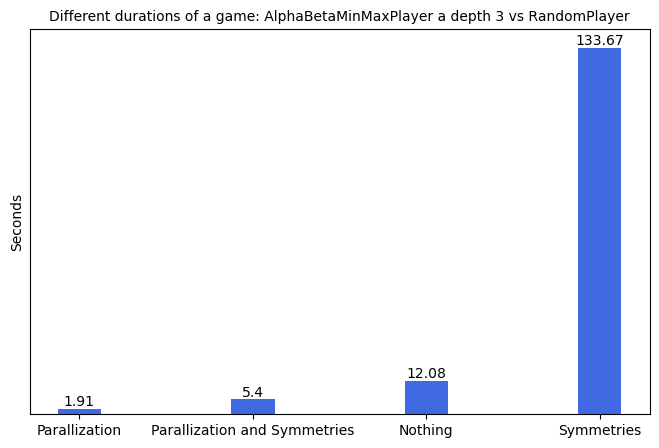

In [33]:
show_minmax_statistics(MinMaxPlayer(depth=3,enhance=True),minute=True)
show_minmax_statistics(AlphaBetaMinMaxPlayer(depth=3,enhance=True))